In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [9, 9]

In [3]:
path = r'C:\Users\Maurice\Desktop\Python\SixNations\fivePlusPlayers01.csv'
playerDF = pd.read_csv(path,encoding = "ISO-8859-1")
print(playerDF.describe())

        Unnamed: 0          Try   Try Assist   Conversion      Penalty  \
count  5902.000000  5902.000000  5902.000000  5902.000000  5902.000000   
mean     23.270078     0.108268     0.070315     0.085734     0.095391   
std      17.604822     0.352159     0.285745     0.492034     0.546948   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      10.000000     0.000000     0.000000     0.000000     0.000000   
50%      20.000000     0.000000     0.000000     0.000000     0.000000   
75%      34.000000     0.000000     0.000000     0.000000     0.000000   
max     107.000000     3.000000     3.000000     9.000000     7.000000   

         Drop Goal       Points       Passes         Runs   Meters Run  \
count  5902.000000  5902.000000  5902.000000  5902.000000  5902.000000   
mean      0.002542     0.919011     5.911555     4.636733    14.837004   
std       0.050354     2.816217    13.846214     4.340318    22.715317   
min       0.000000     0.000000     0

In [4]:
print(playerDF.columns)

Index(['Unnamed: 0', 'Name', 'Position', 'Try', 'Try Assist', 'Conversion',
       'Penalty', 'Drop Goal', 'Points', 'Passes', 'Runs', 'Meters Run',
       'Clean Breaks', 'Defenders Beaten', 'Offloads', 'Turnovers Conceeded',
       'Tackles', 'Missed Tackles', 'Lineouts Won', 'Penalties',
       'Yellow Cards', 'Red Cards', 'Team', 'Opposition', 'Points For',
       'Points Against', 'Home/Away', 'Date', 'DateTime', 'Net Points',
       'ITScore', 'GUScore', 'ITRolling', 'GURolling'],
      dtype='object')


In [6]:
X1 = playerDF[['Name', 'Position', 'Team', 'Opposition', 'Home/Away', 'ITRolling', 'GURolling']]
y = playerDF.ITScore
print(X1.head(10))
X = pd.get_dummies(X1)
print(X.head(10))

          Name Position   Team Opposition Home/Away  ITRolling  GURolling
0  L Halfpenny       FB  WALES        ENG      Home  19.333333  30.233333
1  L Halfpenny       FB  WALES       SCOT      Away  19.333333  30.233333
2  L Halfpenny       FB  WALES        FRA      Away  19.333333  30.233333
3  L Halfpenny       FB  WALES        IRE      Home  19.333333  30.233333
4  L Halfpenny       FB  WALES      ITALY      Away  23.000000  32.300000
5  L Halfpenny       FB  WALES        IRE      Away  18.333333  30.166667
6  L Halfpenny       FB  WALES      ITALY      Home  13.333333  23.133333
7  L Halfpenny       FB  WALES        AUS      Home  10.000000  18.500000
8  L Halfpenny       FB  WALES        ARG      Home   8.333333   8.800000
9  L Halfpenny        W  WALES        JPN      Home  17.000000  19.266667
   ITRolling  GURolling  Name_A Allan  Name_A Beard  Name_A Belleau  \
0  19.333333  30.233333             0             0               0   
1  19.333333  30.233333             0       

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor
player_model = RandomForestRegressor()
player_model.fit(X_train, y_train)

for name, score in zip(X_train.columns, player_model.feature_importances_):
    print(name, ":", score)

ITRolling : 0.24806758448747743
GURolling : 0.11527467295510445
Name_A Allan : 1.5630871138270174e-05
Name_A Beard : 4.603995701373249e-05
Name_A Belleau : 0.00035393199332945486
Name_A Conway : 4.177700660503908e-06
Name_A Cuthbert : 0.0002003293203357083
Name_A Davies : 0.00019921479716473252
Name_A Dell : 0.0004953214576234614
Name_A Dickinson : 0.0004681201470755219
Name_A Dumoulin : 2.965228483975304e-05
Name_A Dunbar : 0.0018447737804507557
Name_A Dupont : 0.0006713471618803094
Name_A Esposito : 0.0002575385672373007
Name_A Flanquart : 9.438911788615779e-05
Name_A Goode : 0.0012744303155718087
Name_A Hastings : 0.0011908283980308454
Name_A Hepburn : 4.7447171901538903e-05
Name_A Iturria : 5.494862030745478e-05
Name_A Jarvis : 7.312356120342928e-05
Name_A Jones : 0.0013475838545377514
Name_A Lovotti : 0.00044146216455351794
Name_A Lozowski : 0.000337576113568987
Name_A Manici : 2.361293993509985e-06
Name_A Marchi : 3.9910936668351065e-05
Name_A Masi : 0.0004022040858971283
Name_A 

In [8]:
from sklearn.metrics import mean_absolute_error
predicted_ratings = player_model.predict(X_test)

print(predicted_ratings)
print()
print(mean_absolute_error(y_test, predicted_ratings))

[ 3.   5.3 10.7 ...  4.1  7.1  1. ]

6.089322607959357


In [31]:
def get_mae(n_estimators, predictors_train, predictors_val, targ_train, targ_val):
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=0)
    model.fit(predictors_train, targ_train)
    preds_val = model.predict(predictors_val)
    mae = mean_absolute_error(targ_val, preds_val)
    return mae


# compare MAE with differing values of max_leaf_nodes
for n_estimators in [5, 50, 500]:
    my_mae = get_mae(n_estimators, X_train, X_test, y_train, y_test)
    print("Number of Estimators: %d  \t\t Mean Absolute Error:  %d" % (n_estimators, my_mae))

Number of Estimators: 5  		 Mean Absolute Error:  6
Number of Estimators: 50  		 Mean Absolute Error:  6
Number of Estimators: 500  		 Mean Absolute Error:  6


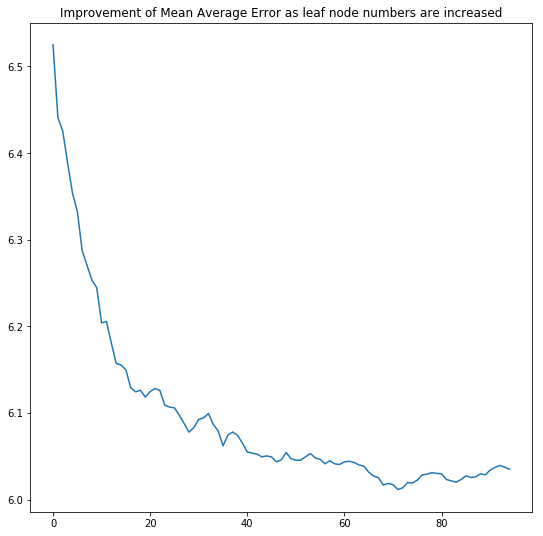

In [33]:
maes = []
for n_estimators in list(range(5,100)):
                           maes.append(get_mae(n_estimators, X_train, X_test, y_train, y_test))

plt.plot(maes)
plt.title("Improvement of Mean Average Error as leaf node numbers are increased")
plt.show()